# MLFLOW demo

### Misc

Quickstart: [MLflow Tracking Quickstart](https://www.mlflow.org/docs/latest/ml/tracking/quickstart/)

Example: [Streamlining Text Classification Models with MLflow: A Comprehensive Guide](https://medium.com/scrapehero/streamlining-text-classification-models-with-mlflow-a-comprehensive-guide-6cc3ce71ed90)

FastAPI: [Tracking with MLFlow & Deployment with FastAPI](https://medium.com/analytics-vidhya/fundamentals-of-mlops-part-4-tracking-with-mlflow-deployment-with-fastapi-61614115436)

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


### Global variables

In [2]:
DATA_PATH = "data/wine_quality_merged.csv"

## Step 1: Load data & preprocess

In [3]:
df = pd.read_csv(DATA_PATH)

The dataset is not balanced, but data is mostly clean.

In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [5]:
lb = LabelBinarizer()
df["type"] = lb.fit_transform(df["type"])

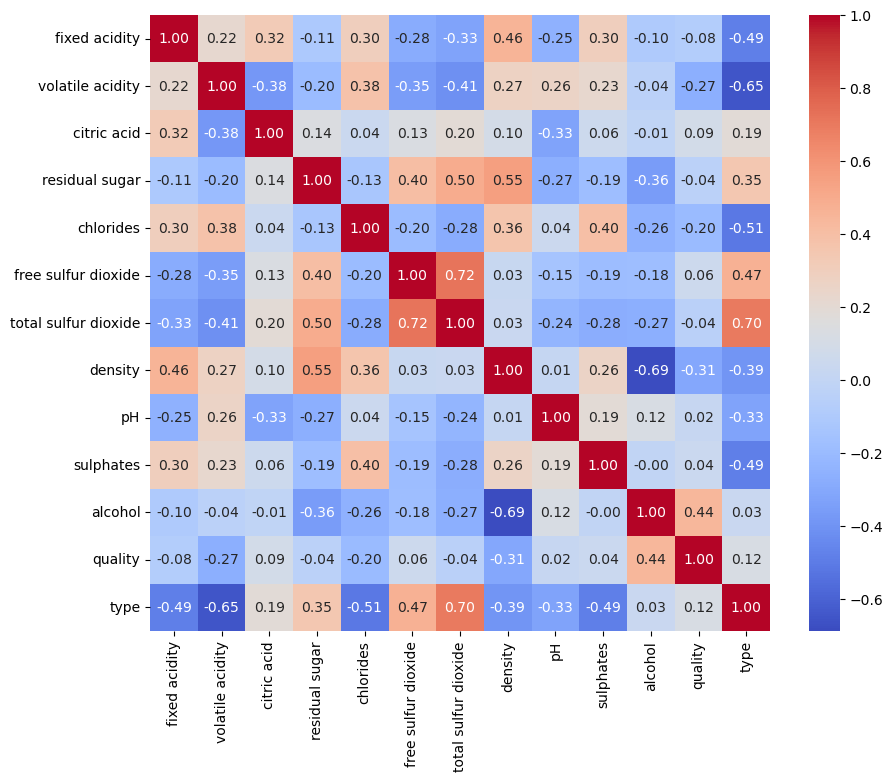

In [6]:
cor_table = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Step 2: Train a model

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["type"], axis=1), df["type"], test_size=0.2, random_state=42)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(x_test)
results = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       341
           1       0.98      0.99      0.99       959

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300

